In [20]:
import glob
import os
import json

# Path to the directory to search for files
directory_path = r'4'

# Pattern to match the files
file_pattern = 'result_*'

# Recursively find all files matching the pattern
file_paths = glob.glob(os.path.join(directory_path, '**', file_pattern), recursive=True)
print(f"Found {len(file_paths)} files matching the pattern.")

Found 4 files matching the pattern.


In [21]:
# Function to parse a single JSON file
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return {
            'Algorithm': data['Algorithm'],
            'Total Time Taken': data['Total Time Taken'],
            'Total Files': data['totalFiles']
        }

# Parse all found files
parsed_data = [parse_json_file(path) for path in file_paths]


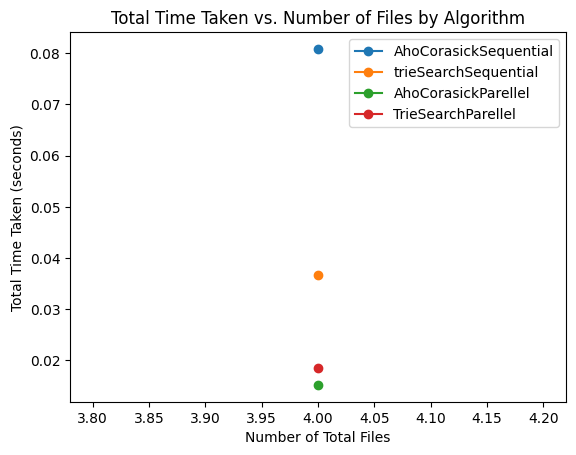

In [22]:
import matplotlib.pyplot as plt

# Assuming 'data' is a list of dictionaries with keys 'Algorithm', 'Total Time Taken', and 'Total Files'
# Example: data = [{'Algorithm': 'A', 'Total Time Taken': 10, 'Total Files': 100}, {...}, ...]

# Organize data by algorithm
data_by_algorithm = {}
for entry in parsed_data:
    if entry['Algorithm'] not in data_by_algorithm:
        data_by_algorithm[entry['Algorithm']] = []
    data_by_algorithm[entry['Algorithm']].append((entry['Total Files'], entry['Total Time Taken']))

# Sort data points by the number of total files and plot them
for algorithm, points in data_by_algorithm.items():
    # Sort the list of tuples by the first item (Total Files) using lambda function
    points.sort(key=lambda x: x[0])
    total_files, total_times = zip(*points)  # This unzips the sorted tuples into two lists

    # Plot lines with points marked
    plt.plot(total_files, total_times, label=algorithm, marker='o')

plt.xlabel('Number of Total Files')
plt.ylabel('Total Time Taken (seconds)')
plt.title('Total Time Taken vs. Number of Files by Algorithm')
plt.legend()
plt.show()


In [9]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors
import json
import os

# Function to parse JSON files and extract analysis data
def parse_json_for_report(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return data


# Create a PDF for the report
report_file_path = r'analysis_report.pdf'
pdf = SimpleDocTemplate(report_file_path, pagesize=letter)

# List to hold each part of the report
elements = []

# Parsing and processing each file
for file_path in file_paths:
    data = parse_json_for_report(file_path)
    algorithm = data['Algorithm']
    total_files = data['totalFiles']
    total_time = data['Total Time Taken']

    
    # Define column names and widths
    column_names = ['File name', 'Runtime', 'Total words', 'Positive', 'Negative', 'Stop', 'Polarity']
    # Assume 7 is the approximate character width in points
    column_widths = [35 * 7, 50, 60, 50, 50, 50, 50]

    # Creating the table data with new column names
    table_data = [column_names]
    for item in data['analysis']:
        table_data.append([
            item['name'][:35],  # Limit to 35 characters
            f"{item['TimeTaken']:.2f}s",  # Format to 2 decimal places
            f"{item['totalWords']}",
            f"{item['positiveWords']}",
            f"{item['negativeWords']}",
            f"{item['stopWords']}",
            f"{item['polarity']}"
        ])

    # Adding a page break if not the first table
    if elements:
        from reportlab.platypus import PageBreak
        elements.append(PageBreak())

    # Adding the table with a title
    title = f"{algorithm} - Total Files: {total_files} - Total Time: {total_time:.6f} seconds"
    elements.append(Table([[title]], colWidths=[460], style=[('ALIGN', (0, 0), (-1, -1), 'LEFT'),
                                                     ('TEXTCOLOR', (0, 0), (-1, -1), colors.blue),
                                                     ('FONTSIZE', (0, 0), (-1, -1), 14),
                                                            ('BOTTOMPADDING', (0,0), (-1,0), 12)]))
    # Create the table with specified column widths
    table = Table(table_data, colWidths=column_widths)
    table.setStyle(TableStyle([('INNERGRID', (0, 0), (-1, -1), 0.25, colors.black),
                               ('BOX', (0, 0), (-1, -1), 0.25, colors.black),
                               ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                               ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
                               ('VALIGN', (0, 0), (-1, -1), 'MIDDLE')]))
    elements.append(table)

# Build the PDF
pdf.build(elements)

print(f"Report generated: {report_file_path}")


Report generated: analysis_report.pdf
